In [43]:
#importing data and calculating returns
#Discrete returns are calculated as the change in price as a percentage of the previous period's price
#Log returns are calculated as the difference between the log of two prices 
#Logreturns aggregate across time,while discrete returns aggregate across assets
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #importing for plots
from scipy.stats import skew #importing for skewness
from scipy.stats import kurtosis #importing for kurtosis
from scipy import stats #testing null hypothesis if data is normally distributed

# Fetch historical data
ticker_symbol_1 = 'AAPL'
appl = yf.Ticker(ticker_symbol_1)
historical_data_appl = appl.history(period="2y")

# Extract relevant columns
daily_prices_aapl = historical_data_appl[['Open', 'High', 'Low', 'Close', 'Volume']]

# Convert the index to a string format (YYYY-MM-DD)
daily_prices_aapl.index = daily_prices_aapl.index.strftime('%Y-%M-%d')

# Add daily returns
daily_prices_aapl.loc[:, "Returns"] = daily_prices_aapl["Close"].pct_change()

# Display the transformed data frame
print(daily_prices_aapl.tail())

                  Open        High         Low       Close    Volume   Returns
Date                                                                          
2024-00-26  169.880005  171.339996  169.179993  169.300003  44838400 -0.003473
2024-00-29  173.369995  176.029999  173.100006  173.500000  68169400  0.024808
2024-00-30  173.330002  174.990005  170.000000  170.330002  65934800 -0.018271
2024-00-01  169.580002  172.710007  169.110001  169.300003  50281200 -0.006047
2024-00-02  172.419998  172.779999  170.889999  172.649994  38929833  0.019787


<ipython-input-43-ba1221381159>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_prices_aapl.loc[:, "Returns"] = daily_prices_aapl["Close"].pct_change()


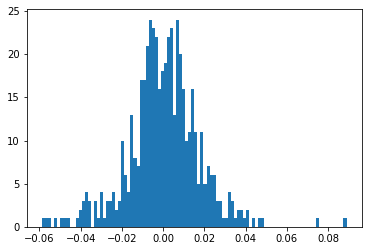

In [24]:
#visualizing return distributions
plt.hist(daily_prices_aapl["Returns"].dropna(), bins=100, density=False)
plt.show()

In [47]:
#calculating mean, var, kurtosis and skewness of the distribution
mean_return = np.mean(daily_prices_aapl["Returns"])
#annulized mean
annulized_mean = ((1+np.mean(daily_prices_aapl["Returns"]))**252)-1
#std dev
std_deviation = np.std(daily_prices_aapl["Returns"])
#variance
var_return = np.std(daily_prices_aapl["Returns"])**2
#annulized volatility
annulized_vol = np.std(daily_prices_aapl["Returns"]) * np.sqrt(252)
#skewness
skew_1 = skew(daily_prices_aapl["Returns"].dropna())
#kurtosis
kurt_1 = kurtosis(daily_prices_aapl["Returns"].dropna())

#printing out 
print(f"Mean: {mean_return}")
print(f"Mean annulized: {annulized_mean}")
print(f"Standard deviation: {std_deviation}")
print(f"Variance: {var_return}")
print(f"Annulized volatility: {annulized_vol}")
print(f"Skewness: {skew_1}")
print(f"Kurtosis: {kurt_1}")


Mean: 0.00035066021357493804
Mean annulized: 0.0923713505893573
Standard deviation: 0.01739848828830159
Variance: 0.00030270739471816764
Annulized volatility: 0.27619243919589515
Skewness: 0.08565214066945068
Kurtosis: 2.4325332837358538


In [46]:
#is the data normally distributed

p_value = stats.shapiro(daily_prices_aapl["Returns"].dropna())[1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected, not a normal distribution.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected, not a normal distribution.
